In [1]:
#Importing the dataset
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/gaurisonawane/Downloads/delivery_time (1).csv")

In [3]:
#EDA
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.shape

(21, 2)

In [5]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


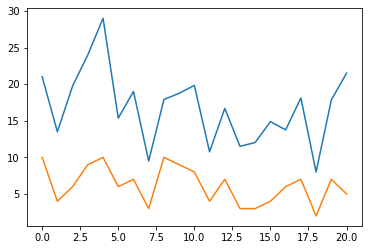

In [8]:
import matplotlib.pyplot as plt
plt.plot(data)

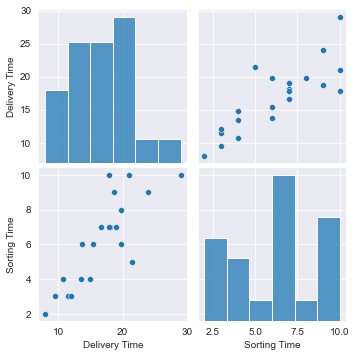

In [9]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [10]:
data.columns = ['Delivery_Time', 'Sorting_Time']

In [11]:
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


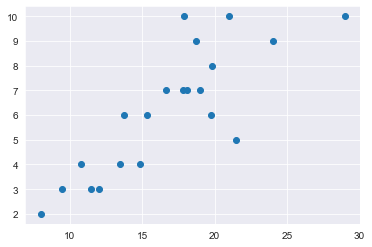

In [12]:
plt.scatter(data.Delivery_Time, data.Sorting_Time)

In [13]:
#Correlation
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery_Time', ylabel='Count'>

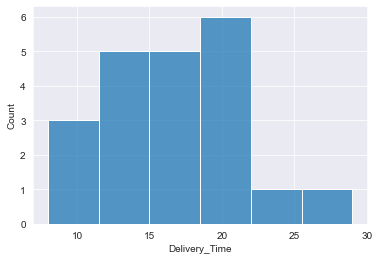

In [14]:
sns.histplot(data.Delivery_Time)

<AxesSubplot:xlabel='Sorting_Time', ylabel='Count'>

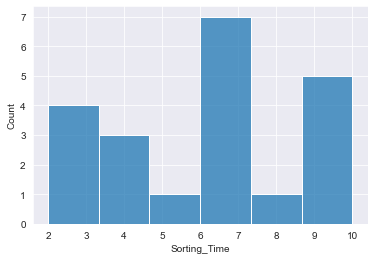

In [15]:
sns.histplot(data.Sorting_Time)

In [16]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time", data=data).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

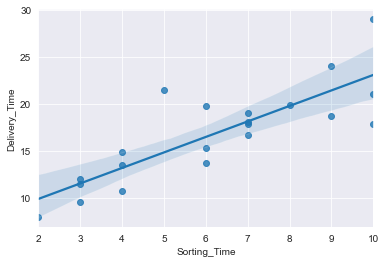

In [17]:
sns.regplot(x = 'Sorting_Time', y = 'Delivery_Time', data = data)

In [18]:
#Coefficients
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [19]:
#t and p-values
print(model.pvalues, '\n', model.tvalues)

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64 
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64


In [20]:
#R squared values
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [21]:
#Building model on transformed data
import numpy as np
Delivery_time = data['Delivery_Time']
log_Sorting_time = np.log10(data['Sorting_Time'])

In [22]:
log_data = [Delivery_time, log_Sorting_time]

In [23]:
df = pd.DataFrame(log_data)

In [24]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Delivery_Time,21.0,13.50000,19.750000,24.000000,29.0,15.350000,19.000000,9.500000,17.9,18.750000,...,10.75000,16.680000,11.500000,12.030000,14.88000,13.750000,18.110000,8.00000,17.830000,21.50000
Sorting_Time,1.0,0.60206,0.778151,0.954243,1.0,0.778151,0.845098,0.477121,1.0,0.954243,...,0.60206,0.845098,0.477121,0.477121,0.60206,0.778151,0.845098,0.30103,0.845098,0.69897


In [25]:
df1 = pd.DataFrame.transpose(df)

In [26]:
df1.head()

,Delivery_Time,Sorting_Time
0,21.00,1.000000
1,13.50,0.602060
2,19.75,0.778151
3,24.00,0.954243
4,29.00,1.000000


In [27]:
model1 = smf.ols('Delivery_Time~Sorting_Time', data = df1).fit()

In [28]:
model1.params

Intercept        1.159684
Sorting_Time    20.823229
dtype: float64

In [29]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           2.64e-06
Time:                        15:51:06   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1597      2.455      0.472      0.642      -3.978       6.297
Sorting_Time    20.8232      3.161      6.587      0.000      14.206      27.440
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         7.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""